In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../Alemania_Reducida.csv')
data['2'] = pd.to_datetime(data['2'], format= '%Y')
data.set_index('2',inplace = True)
data = data['PIB (US$ a precios constantes de 2010)'].dropna()

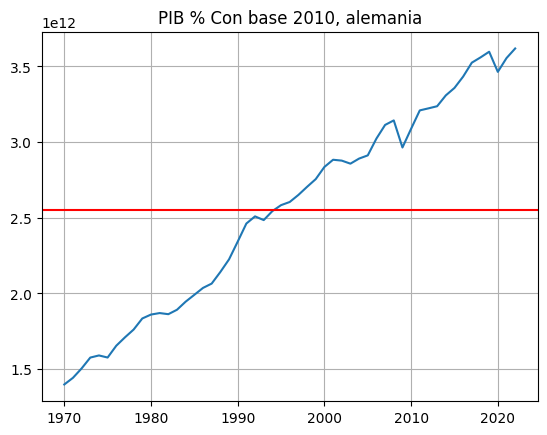

count    5.300000e+01
mean     2.551963e+12
std      6.784249e+11
min      1.398784e+12
25%      1.892372e+12
50%      2.604143e+12
75%      3.113153e+12
max      3.618134e+12
Name: PIB (US$ a precios constantes de 2010), dtype: float64

In [40]:
plt.plot(data)
plt.title('PIB % Con base 2010, alemania')
plt.grid()
plt.axhline(y = data.mean(), color = 'red')
plt.show()
data.describe()

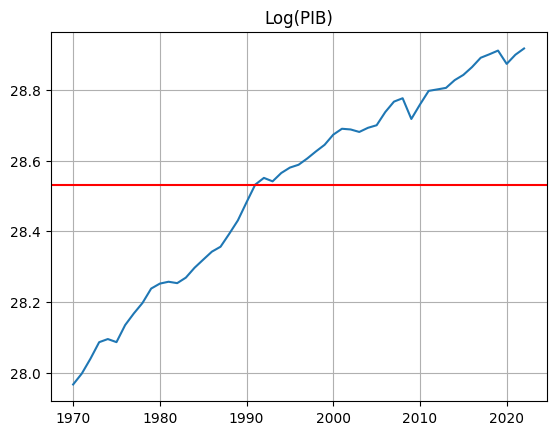

count    53.000000
mean     28.530273
std       0.283063
min      27.966625
25%      28.268852
50%      28.588125
75%      28.766657
max      28.916980
Name: PIB (US$ a precios constantes de 2010), dtype: float64

In [43]:
log = np.log(data)
plt.plot(log)
plt.axhline(y = log.mean(), color = 'red')
plt.title('Log(PIB)')
plt.grid()
plt.show()
log.describe()

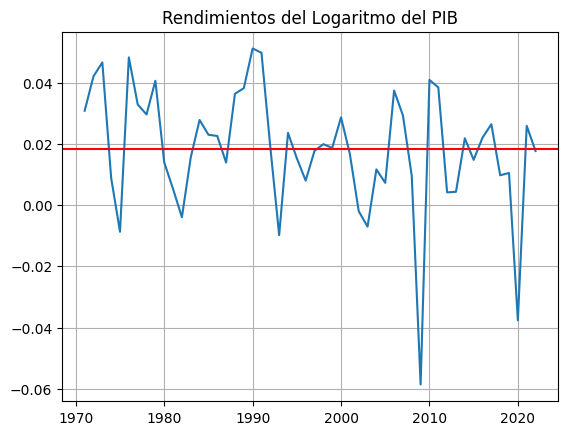

In [44]:
log = np.log(data)
df_log = (log - log.shift(1)).dropna()
plt.plot(df_log)
plt.title('Rendimientos del Logaritmo del PIB')
plt.axhline(y = df_log.mean(), color = 'red')
plt.grid()
plt.show()

<Figure size 1000x1000 with 0 Axes>

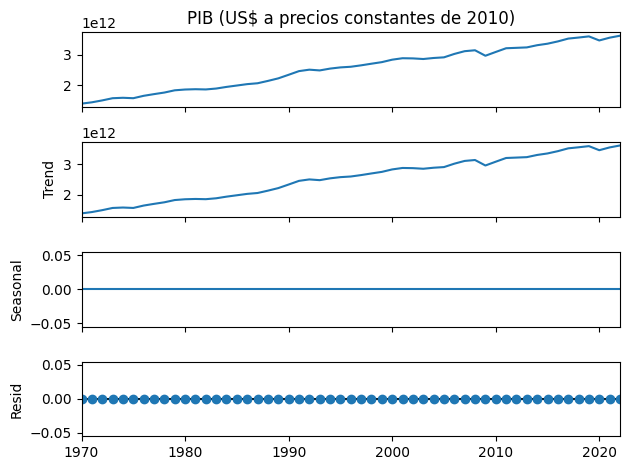

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
result = seasonal_decompose(data ,model = 'additive')
result.plot()
plt.show()


<Figure size 1000x1000 with 0 Axes>

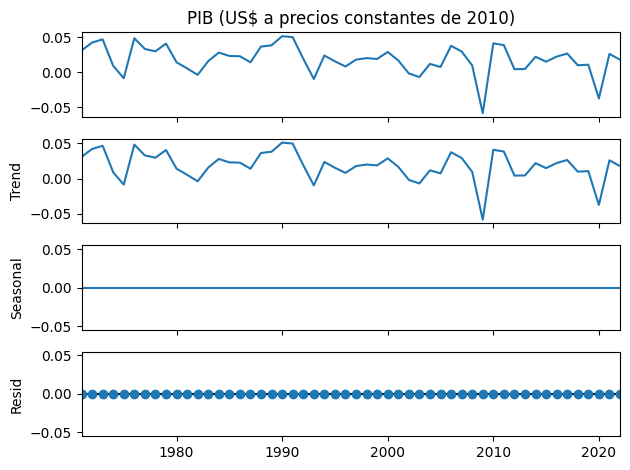

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
result = seasonal_decompose(df_log ,model = 'additive')
result.plot()
plt.show()

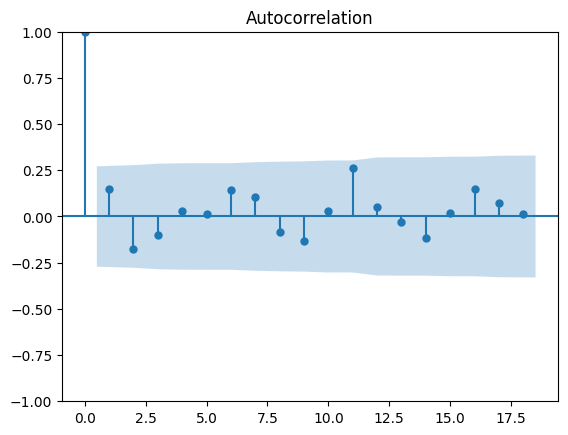

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# El FAS me dice que mi media movil puede ser 1
plot_acf(df_log)
plt.show()

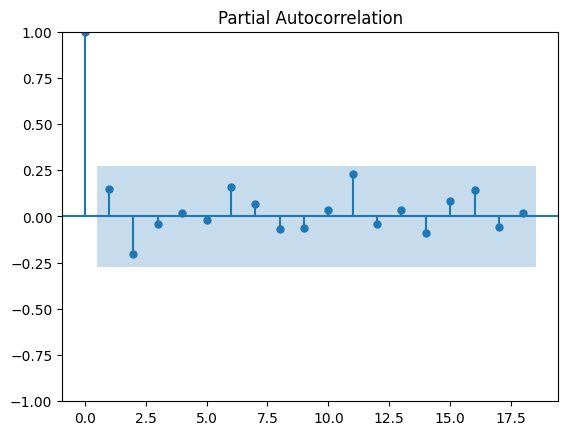

In [50]:
# EL FAP me dice que mi Auto Regresion puede ser 1
plot_pacf(df_log)
plt.show()

### Interpretacion

- En un modelo ARMA es problable que la combinanción usada para este sea (1,1) de los datos de rendimientos de logaritmo de el PIB